In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기

In [11]:
df = pd.read_csv('./datasets/KRPUS_CNDAG/05e4d21a-31a0-3476-adf8-792558757ade.csv')
print(df.shape)
display(df.head())

(268, 12)


,VSL_ID,TIMESTAMP,SPEED,COG,HEADING,DRAFT,NAV_STATUS,LAT,LON,DESTINATION,UNLOCODE,ETA
0,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:00:31,5.0,211.5,208.0,5.9,MOORED,35.120610,129.063040,CN DLC,CNDLC,2024-12-16 09:00:00
1,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:10:02,8.8,124.6,124.0,5.9,UNDER_WAY_USING_ENGINE,35.103953,129.067067,CN DLC,CNDLC,2024-12-16 09:00:00
2,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:20:51,9.2,125.7,125.0,5.9,UNDER_WAY_USING_ENGINE,35.087313,129.095240,CN DLC,CNDLC,2024-12-16 09:00:00
3,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:30:21,9.8,149.2,148.0,5.9,UNDER_WAY_USING_ENGINE,35.071070,129.114053,CN DLC,CNDLC,2024-12-16 09:00:00
4,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:40:30,8.3,183.2,191.0,5.9,UNDER_WAY_USING_ENGINE,35.047667,129.129880,CN DLC,CNDLC,2024-12-16 09:00:00


# 결측지 제거

In [14]:
features = ['COG', 'HEADING', 'SPEED', 'LAT', 'LON']
df = df.dropna(subset=features + ['UNLOCODE'])

In [18]:
display(df.head())

,VSL_ID,TIMESTAMP,SPEED,COG,HEADING,DRAFT,NAV_STATUS,LAT,LON,DESTINATION,UNLOCODE,ETA
0,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:00:31,5.0,211.5,208.0,5.9,MOORED,35.120610,129.063040,CN DLC,CNDLC,2024-12-16 09:00:00
1,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:10:02,8.8,124.6,124.0,5.9,UNDER_WAY_USING_ENGINE,35.103953,129.067067,CN DLC,CNDLC,2024-12-16 09:00:00
2,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:20:51,9.2,125.7,125.0,5.9,UNDER_WAY_USING_ENGINE,35.087313,129.095240,CN DLC,CNDLC,2024-12-16 09:00:00
3,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:30:21,9.8,149.2,148.0,5.9,UNDER_WAY_USING_ENGINE,35.071070,129.114053,CN DLC,CNDLC,2024-12-16 09:00:00
4,05e4d21a-31a0-3476-adf8-792558757ade,2024-12-13 14:40:30,8.3,183.2,191.0,5.9,UNDER_WAY_USING_ENGINE,35.047667,129.129880,CN DLC,CNDLC,2024-12-16 09:00:00


# 변수 타켓팅

In [20]:
X = df[features]
y = df['UNLOCODE']

# 타겟 변수 인코딩

In [23]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 학습/테스트 데이터 분리

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 랜덤포레스트 모델 학습

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 예측 및 성능 평가

In [30]:
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

       CNDLC       1.00      1.00      1.00        54

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# 혼동 행렬 시각화

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


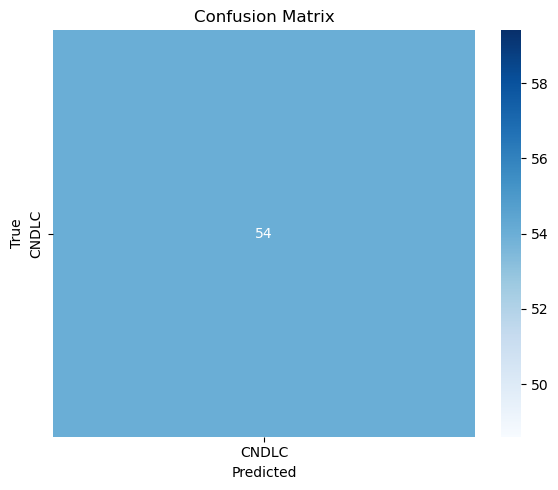

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# 피쳐 중요도 시각화

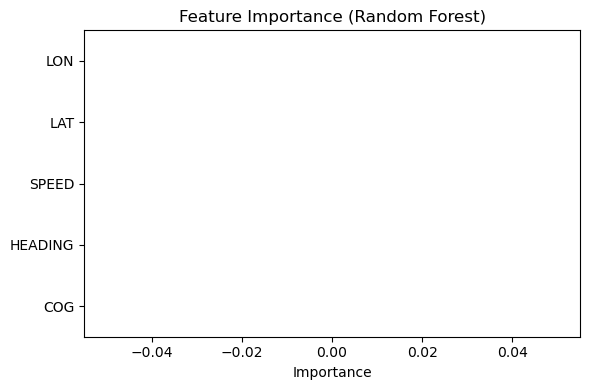

In [34]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(6, 4))
importances.plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# 다른 방법

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [101]:
df_all = pd.read_csv('./datasets/all_merged.csv')
print(df_all.shape)
display(df_all.head())

(184084, 14)


,VSL_ID,TIMESTAMP,SPEED,COG,HEADING,DRAFT,NAV_STATUS,LAT,LON,DESTINATION,UNLOCODE,ETA,COUNTRY,PORT_NAME
0,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:16:05,1.2,165.1,165.0,7.5,UNDER_WAY_USING_ENGINE,35.097428,129.090875,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
1,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:20:46,8.6,166.3,165.0,7.5,UNDER_WAY_USING_ENGINE,35.090990,129.092812,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
2,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:21:51,9.0,154.1,136.0,7.5,UNDER_WAY_USING_ENGINE,35.088320,129.093742,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
3,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:25:45,8.5,125.9,124.0,7.5,UNDER_WAY_USING_ENGINE,35.082338,129.103258,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
4,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:30:45,8.9,153.5,150.0,7.5,UNDER_WAY_USING_ENGINE,35.073797,129.111883,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL


In [59]:
df_fin = df_all[['LAT', 'LON', 'COUNTRY']].dropna()
display(df_fin.head())
print(df_fin.shape)

,LAT,LON,COUNTRY
0,35.097428,129.090875,PH
1,35.090990,129.092812,PH
2,35.088320,129.093742,PH
3,35.082338,129.103258,PH
4,35.073797,129.111883,PH


(184084, 3)


# 샘플링

In [81]:
sample_size = min(1000, len(df))
sampled = df_fin.sample(n=sample_size, random_state=42)

# 입력/출력 나누기
X = sampled[['LAT', 'LON']] # 입력 변수 
y = sampled['COUNTRY'] # 예측 대상

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          CN       0.81      1.00      0.89        21
          HK       0.00      0.00      0.00         3
          JP       0.89      1.00      0.94         8
          KR       0.93      0.87      0.90        15
          RU       0.00      0.00      0.00         1
          TW       0.00      0.00      0.00         0
          VN       0.75      0.50      0.60         6

    accuracy                           0.83        54
   macro avg       0.48      0.48      0.48        54
weighted avg       0.79      0.83      0.80        54



## COUNTRY 예측 결과에 대한 혼동 행렬 시각화

In [89]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지

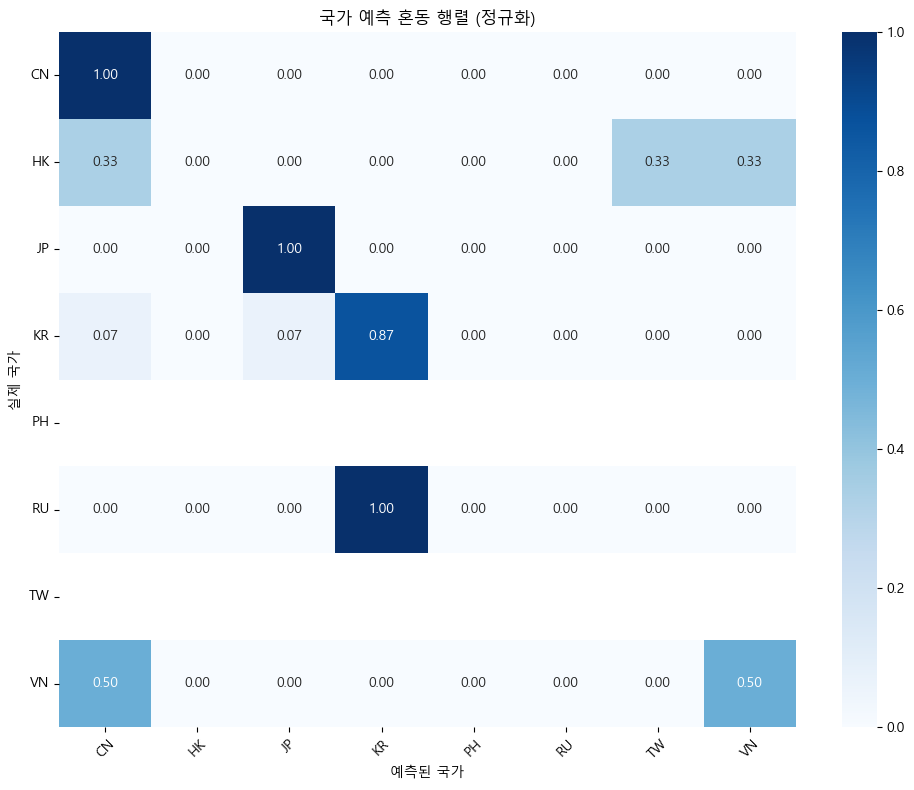

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 혼동 행렬 생성
labels = model.classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("국가 예측 혼동 행렬 (정규화)")
plt.xlabel("예측된 국가")
plt.ylabel("실제 국가")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 다른 방법 2

In [105]:
df_all = pd.read_csv('./datasets/all_merged.csv')
print(df_all.shape)
display(df_all.head())

(184084, 14)


,VSL_ID,TIMESTAMP,SPEED,COG,HEADING,DRAFT,NAV_STATUS,LAT,LON,DESTINATION,UNLOCODE,ETA,COUNTRY,PORT_NAME
0,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:16:05,1.2,165.1,165.0,7.5,UNDER_WAY_USING_ENGINE,35.097428,129.090875,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
1,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:20:46,8.6,166.3,165.0,7.5,UNDER_WAY_USING_ENGINE,35.090990,129.092812,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
2,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:21:51,9.0,154.1,136.0,7.5,UNDER_WAY_USING_ENGINE,35.088320,129.093742,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
3,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:25:45,8.5,125.9,124.0,7.5,UNDER_WAY_USING_ENGINE,35.082338,129.103258,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL
4,5808b892-f82c-3357-90e3-85effb0df39a,2024-12-08 18:30:45,8.9,153.5,150.0,7.5,UNDER_WAY_USING_ENGINE,35.073797,129.111883,PH MNL,PHMNL,2024-12-08 22:00:00,PH,PHMNL


In [111]:
df_sec = df_all[['LAT', 'LON', 'COG', 'HEADING', 'COUNTRY']].dropna()

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [115]:
# 최대 1000개 샘플 추출
sample_size = min(1000, len(df_sec))
sampled = df_sec.sample(n=sample_size, random_state=42)

# 입력 변수 (X): 위도, 경도, 침로, 선수방위
X = sampled[['LAT', 'LON', 'COG', 'HEADING']]
y = sampled['COUNTRY']  # 타깃: 도착 국가

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가 출력
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          CN       0.89      0.90      0.89        80
          HK       0.00      0.00      0.00         4
          JP       0.90      0.97      0.93        36
          KR       0.82      0.89      0.85        46
          PH       1.00      0.80      0.89         5
          RU       1.00      0.57      0.73         7
          TW       0.50      0.29      0.36         7
          VN       0.69      0.60      0.64        15

    accuracy                           0.83       200
   macro avg       0.72      0.63      0.66       200
weighted avg       0.84      0.83      0.83       200



# 변수 중요도 시각화

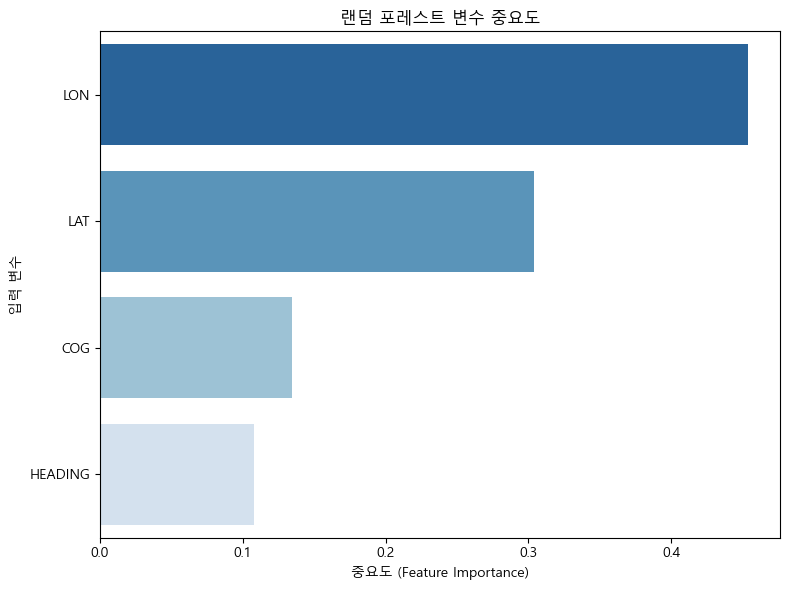

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# 변수 중요도 추출
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='Blues_r')
plt.title("랜덤 포레스트 변수 중요도")
plt.xlabel("중요도 (Feature Importance)")
plt.ylabel("입력 변수")
plt.tight_layout()
plt.show()


# 혼동 행렬 시각화

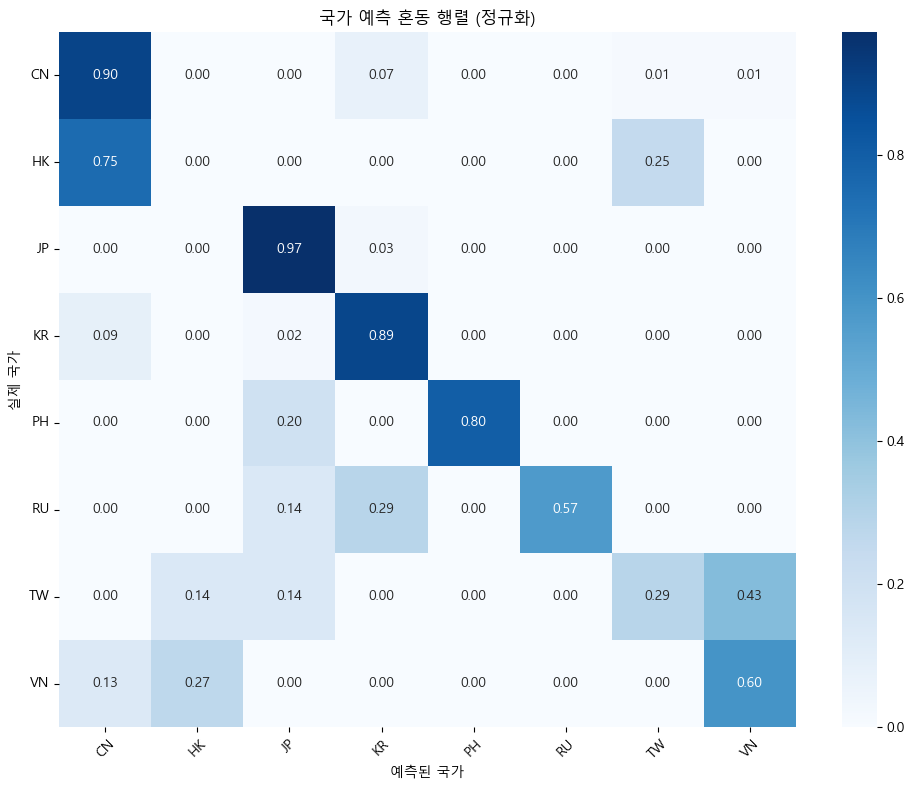

In [123]:
from sklearn.metrics import confusion_matrix
import numpy as np

# 혼동 행렬 계산
labels = model.classes_
cm = confusion_matrix(y_test, y_pred, labels=labels)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 정규화

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("국가 예측 혼동 행렬 (정규화)")
plt.xlabel("예측된 국가")
plt.ylabel("실제 국가")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()